In [77]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Affliation information
This notebook gives an overview of standardardized affiliation information that was manually curated in previous LifeWatch users analyses.

In [78]:
reference_info = execute_to_df("0_reference_info.sparql")

In [79]:
#explore 
reference_info

,standard_affiliation,name,qh,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
0,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
1,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/Research_institute,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2,https://marineinfo.org/id/institute/12964,NaN,NaN,NaN,NaN,,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,,,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
3,https://marineinfo.org/id/institute/471,Ghent University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
4,https://marineinfo.org/id/institute/12,Hasselt University,http://lifewatch.org/ns/Science,http://lifewatch.org/ns/University,true,Kingdom of Belgium,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,BE,BEL,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
...,...,...,...,...,...,...,...,...,...,...
2750,https://marineinfo.org/id/institute/13836,NaN,NaN,NaN,NaN,State of Israel,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,IL,ISR,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2751,http://lifewatch-user-analysis-2023/affiliatio...,NaN,NaN,NaN,NaN,Kingdom of the Netherlands,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,NL,NLD,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2752,http://lifewatch-user-analysis-2023/affiliatio...,NaN,NaN,NaN,NaN,Federal Republic of Germany,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,DE,DEU,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...
2753,https://marineinfo.org/id/institute/13513,NaN,NaN,NaN,NaN,Republic of Kenya,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...,KE,KEN,https://www.iso.org/obp/ui/#iso%3Acode%3A3166%...


In [80]:
reference_info.groupby('name').nunique()

,standard_affiliation,qh,group,flemish,country_name,country_identifier,country_code2,country_code3,country_id
name,,,,,,,,,
AXYS Technologies Inc.,1,1,1,1,1,1,1,1,1
Agentschap voor Natuur en Bos,1,1,1,1,1,1,1,1,1
Amelior,1,1,1,1,1,1,1,1,1
Antarctic Biodiversity Information Facility (ANTABIF),1,1,1,1,1,1,1,1,1
Antwerp Gas Terminal N.V.,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Vlaams Kenniscentrum Water,1,1,1,1,1,1,1,1,1
Vlaamse Milieumaatschappij,1,1,1,1,1,1,1,1,1
Walloon Agricultural Research Center,1,1,1,1,1,1,1,1,1


In [81]:
# affiliations with marineinfo-identifier
marineinfo_affils = reference_info[reference_info["standard_affiliation"].str.contains("https://marineinfo.org/id/institute/")]
m_affil = marineinfo_affils.groupby("standard_affiliation").nunique().sum()['name']

# affiliations with ROR-identifier
ror_affils = reference_info[reference_info["standard_affiliation"].str.contains("https://ror.org/")]
r_affil = ror_affils.groupby("standard_affiliation").nunique().sum()['name']

# affiliations with another identifier
other_affils = reference_info[reference_info["standard_affiliation"].str.contains("/affiliation/")]
o_affil = other_affils.groupby("standard_affiliation").nunique().sum()['name']

print(m_affil ,r_affil ,o_affil)
#reference_info.groupby('name').nunique()

79 7 49


### Quadruple Helix distribution

In [82]:
# Table
qh_dist = reference_info.groupby('qh').nunique()
qh_dist = qh_dist.rename(index={
    'http://lifewatch.org/ns/Civil_society': 'Civil_society', 
    'http://lifewatch.org/ns/Industry': 'Industry', 
    'http://lifewatch.org/ns/Policy': 'Policy',
    'http://lifewatch.org/ns/Science': 'Science'})

qh_dist[['standard_affiliation']].rename(columns={'standard_affiliation':'Affiliation count'}).transpose()

qh,Civil_society,Industry,Policy,Science
Affiliation count,9,14,23,89


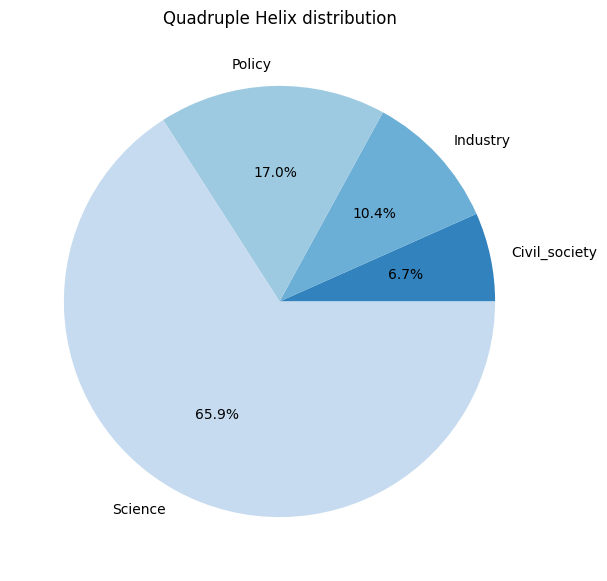

In [102]:
# Graph
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(4))
pie_qh = qh_dist.plot(kind='pie', y='standard_affiliation', figsize=(7, 7), autopct='%1.1f%%', colors=colors, legend=False)

pie_qh.set_title('Quadruple Helix distribution')
pie_qh.set_ylabel('')
plt.show()

In [84]:
qh_group_dist = reference_info.groupby(['qh', 'group']).nunique()
# rename index for better readability
qh_group_dist = qh_group_dist.rename(index={
    'http://lifewatch.org/ns/Civil_society': 'Civil_society', 
    'http://lifewatch.org/ns/Industry': 'Industry', 
    'http://lifewatch.org/ns/Policy': 'Policy',
    'http://lifewatch.org/ns/Science': 'Science', 
    
    'http://lifewatch.org/ns/Creative_body': 'Creative_body',
    'http://lifewatch.org/ns/Non-profit_organization': 'Non-profit_organization',
    'http://lifewatch.org/ns/Other': 'Other',
    'http://lifewatch.org/ns/Company': 'Company',
    'http://lifewatch.org/ns/Consultancy': 'Consultancy',
    'http://lifewatch.org/ns/Governmental_body': 'Governmental_body',
    'http://lifewatch.org/ns/Defence': 'Defence',
    'http://lifewatch.org/ns/Governmental_body 	': 'Governmental_body', 
    'http://lifewatch.org/ns/Other_public_authorities': 'Other_public_authorities', 
    'http://lifewatch.org/ns/Data_infrastructure': 'Data_infrastructure', 
    'http://lifewatch.org/ns/International_programme': 'International_programme', 
    'http://lifewatch.org/ns/Museum': 'Museum',
    'http://lifewatch.org/ns/Research_Institute': 'Research_Institute',
    'http://lifewatch.org/ns/Research_institute':'Research_institute', #note: typo in input file (will be removed)
    'http://lifewatch.org/ns/Research_network':'Research_network',
    'http://lifewatch.org/ns/University':'University'
    
})

In [85]:
# Table
qh_group_dist[['standard_affiliation']].rename(columns={'standard_affiliation':'Affiliation count'})

Affiliation count
qh            group                                      
Civil_society Creative_body                             1
              Non-profit_organization                   6
              Other                                     2
Industry      Company                                  11
              Consultancy                               3
Policy        Defence                                   3
              Governmental_body                        16
              Other_public_authorities                  4
Science       Data_infrastructure                       3
              International_programme                   2
              Museum                                    4
              Research_Institute                        1
              Research_institute                       50
              Research_network                          1
              University                               28

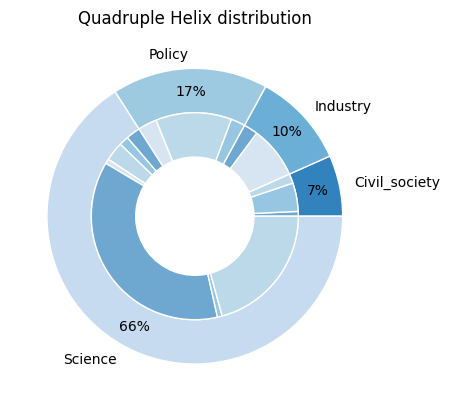

In [113]:
# Graph
df = qh_group_dist.copy().reset_index()
df_qh = df.groupby('qh', sort=False)['standard_affiliation'].sum()
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4))
#inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
inner_colors = outer_colors.copy()
inner_colors[:, -1] *= 0.7

ax.pie(df_qh, labels=df_qh.index , radius=1, colors=outer_colors, autopct='%1.0f%%', pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df['standard_affiliation'], radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Quadruple Helix distribution')
plt.show()

### The number of affiliations per country

In [87]:
# In the reference info there are 2 species cases for country:
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU> = EU affiliations 
#      <https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA> = personal affiliations 

reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_name'] = 'Europe'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_code2'] = 'EU'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AEU' , 'country_code3'] = 'EUR'

reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_name'] = 'personal'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_code2'] = 'personal'
reference_info.loc[ reference_info['country_identifier'] == 'https://www.iso.org/obp/ui/#iso%3Acode%3A3166%3AXAA' , 'country_code3'] = 'personal'

In [88]:
# wrangle dataframe into right format 
count_info = reference_info.groupby('country_code2').count()
count_info['non-flemish'] = 0
count_info['other'] = count_info['standard_affiliation']

count_info.loc['BE', 'non-flemish'] = count_info.loc['BE', 'standard_affiliation'] - count_info.loc['BE', 'flemish']
count_info.loc['BE', 'other'] = 0

#### Top 20 countries

In [89]:
#subset to top 20 of countries with highest affliation count
count_info_top20 = count_info.sort_values(by='standard_affiliation', ascending=False)
count_info_top20 = count_info_top20.head(20)
count_info_top20.sort_values(by='standard_affiliation', ascending=True, inplace=True)
count_info_top20_reduced = count_info_top20[['flemish', 'non-flemish', 'other']]

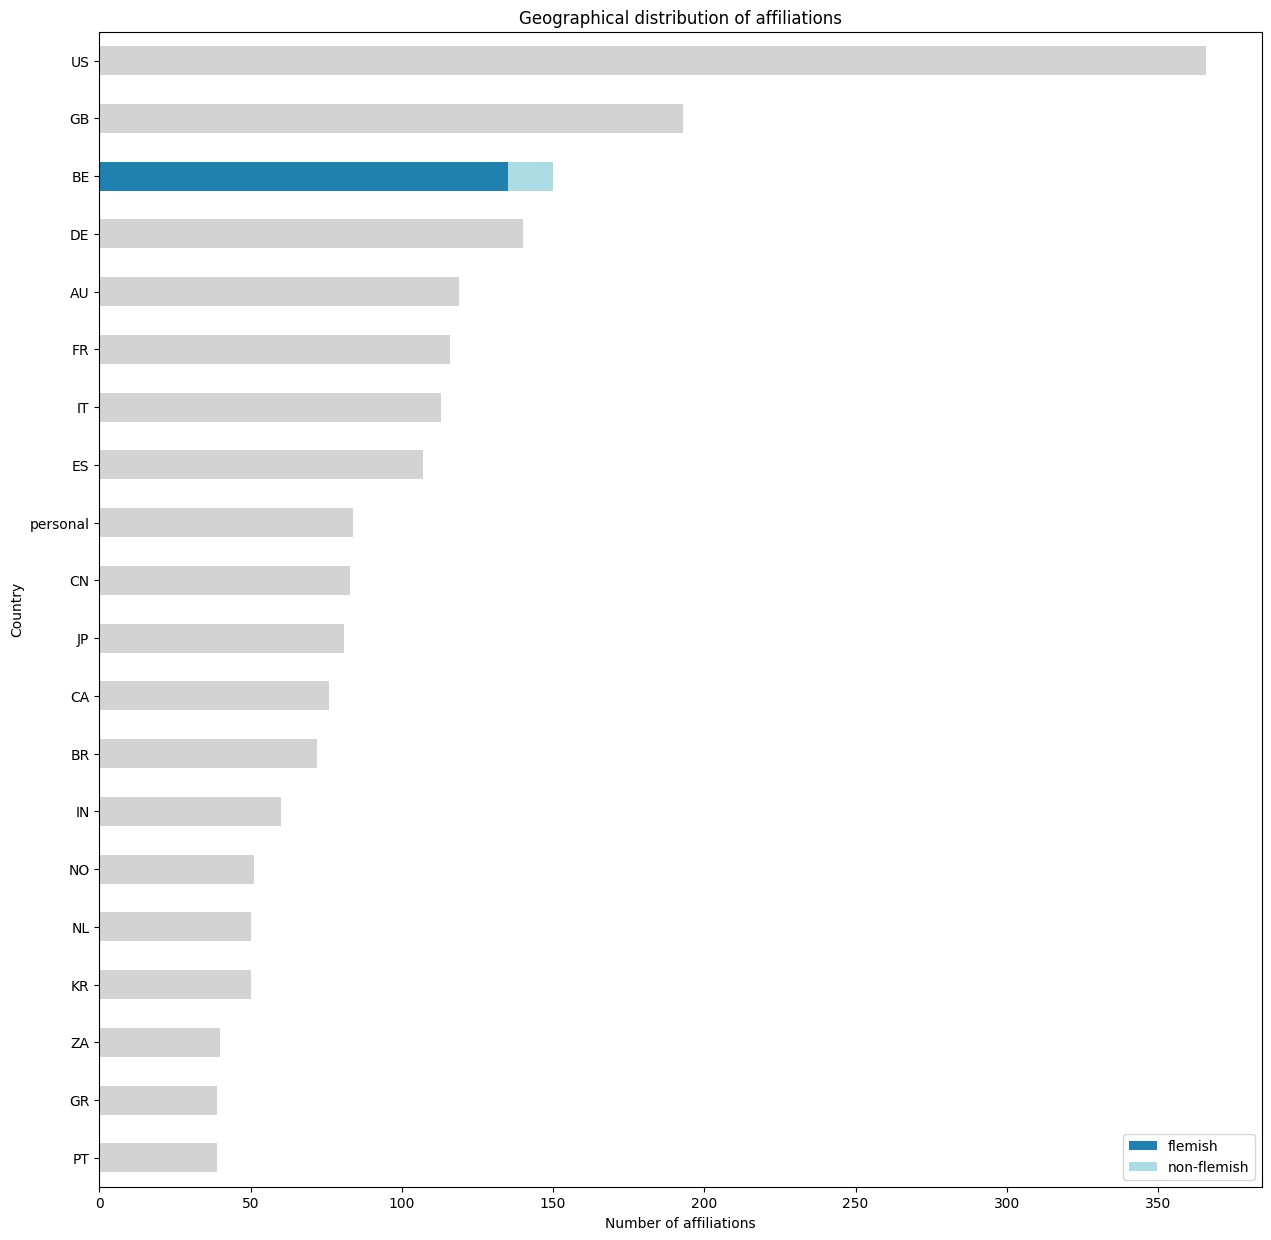

In [96]:
# Horizontal bar chart of number of affiliations per country, with a distinction between flemish and non-flemish for Belgium affiliations - for top-50 of countries
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_top20 = count_info_top20_reduced.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_top20.set_title('Geographical distribution of affiliations')
barh_top20.set_xlabel('Number of affiliations')
barh_top20.set_ylabel('Country')
barh_top20.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()

#### All countries

In [91]:
#(all countries)
count_info.sort_values(by='standard_affiliation', ascending=True, inplace=True)
count_info_reduced = count_info[['flemish', 'non-flemish', 'other']]

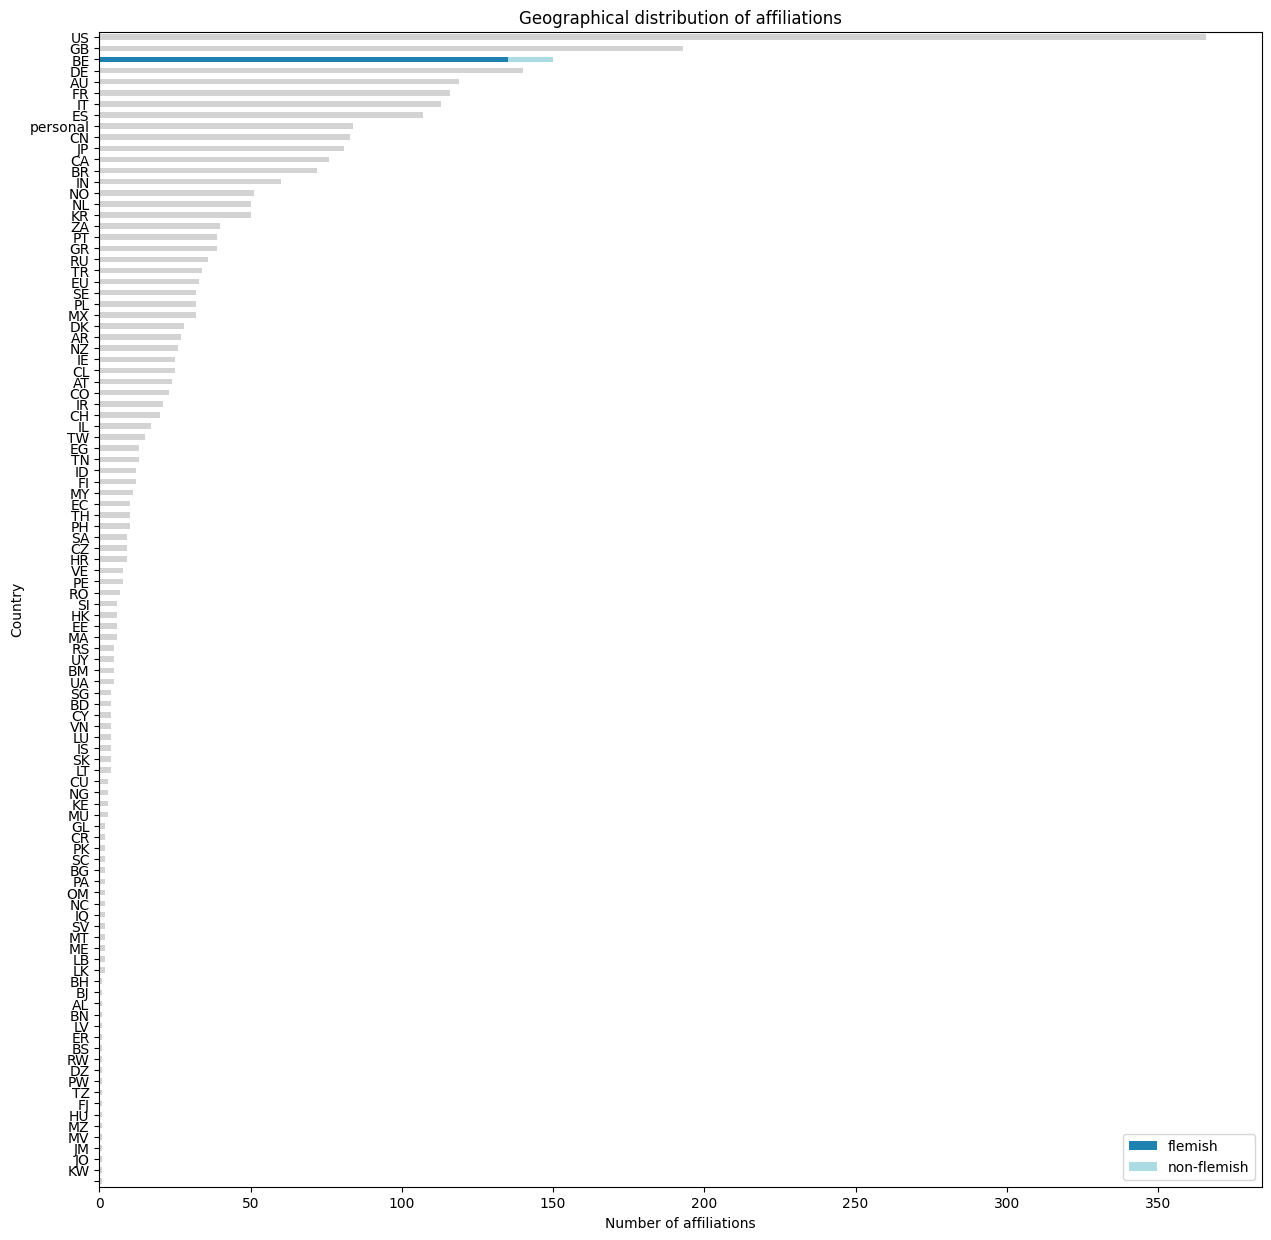

In [97]:
# Horizontal bar chart of number of affiliations per country, with a distinction between flemish and non-flemish for Belgium affiliations - for all countries
colors = ['#1e81b0', '#abdbe3', 'lightgrey']
barh_all = count_info_reduced.plot(kind='barh', y=['flemish','non-flemish', 'other'], stacked=True, color=colors, figsize=(15, 15))

barh_all.set_title('Geographical distribution of affiliations')
barh_all.set_xlabel('Number of affiliations')
barh_all.set_ylabel('Country')
barh_all.legend(['flemish', 'non-flemish'], loc="lower right")
plt.show()